# Load, clean, transform and export new dataset

## Import libraries

In [1]:
# Import pandas, numpy, matplotlib and seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set the plotting style
sns.set_style("whitegrid")

## Load the data

In [2]:
sea_df = pd.read_csv('https://raw.githubusercontent.com/brisamh/weather/refs/heads/main/data/seattle_rain.csv')
sea_df.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
0,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/1/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
1,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/2/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
2,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/3/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
3,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/4/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
4,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/5/18,NaN,NaN,0.25,NaN,NaN,NaN,NaN


In [3]:
pdx_df = pd.read_csv('https://raw.githubusercontent.com/brisamh/weather/refs/heads/main/data/pdx_rain.csv')
pdx_df.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD
0,USC00356749,"PORTLAND KGW TV, OR US",2018-01-01,NaN,NaN,0.00,0.0,0.0
1,USC00356749,"PORTLAND KGW TV, OR US",2018-01-02,NaN,NaN,0.00,0.0,0.0
2,USC00356749,"PORTLAND KGW TV, OR US",2018-01-03,NaN,NaN,0.00,0.0,0.0
3,USC00356749,"PORTLAND KGW TV, OR US",2018-01-04,NaN,NaN,0.06,0.0,0.0
4,USC00356749,"PORTLAND KGW TV, OR US",2018-01-05,NaN,NaN,0.27,0.0,0.0


## Explore the contents of the data sets

##### Examine the shape of each dataset -- we expect 1,826 rows (each row corresponds to one day within 5 years of data plus a leap year)

In [4]:
sea_df.shape
# Seattle has fewer rows but more columns

(1658, 10)

In [5]:
pdx_df.shape

(1826, 8)

In [6]:
# check which columns they have in common
sea_df_cols = set(sea_df.columns)
pdx_df_cols = set(pdx_df.columns)

print(sea_df_cols.intersection(pdx_df_cols))
# the columns I need are Station, Date, Name, PRCP
# this confirms despite difference in shape I have the right columns

{'DATE', 'SNOW', 'PRCP', 'SNWD', 'DAPR', 'STATION', 'NAME', 'MDPR'}


In [7]:
# check the number of nulls in each column
sea_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658 entries, 0 to 1657
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  1658 non-null   object 
 1   NAME     1658 non-null   object 
 2   DATE     1658 non-null   object 
 3   DAPR     23 non-null     float64
 4   MDPR     23 non-null     float64
 5   PRCP     1636 non-null   float64
 6   SNOW     353 non-null    float64
 7   SNWD     66 non-null     float64
 8   WESD     15 non-null     float64
 9   WESF     28 non-null     float64
dtypes: float64(7), object(3)
memory usage: 129.7+ KB


In [8]:
pdx_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  1826 non-null   object 
 1   NAME     1826 non-null   object 
 2   DATE     1826 non-null   object 
 3   DAPR     3 non-null      float64
 4   MDPR     3 non-null      float64
 5   PRCP     1817 non-null   float64
 6   SNOW     1826 non-null   float64
 7   SNWD     1826 non-null   float64
dtypes: float64(5), object(3)
memory usage: 114.2+ KB


#### We see from the above that PDX has the right number of dates, but seattle is missing values
Let's drill down into the date formats and confirm stations are unique

In [9]:
print('Unique values within sea_df for STATION:')
print(sea_df['STATION'].unique())
print('Unique values within pdx_df for STATION:')
print(pdx_df['STATION'].unique())

Unique values within sea_df for STATION:
['US1WAKG0225']
Unique values within pdx_df for STATION:
['USC00356749']


In [10]:
print('Max and Min values within sea_df for DATE:')
print(sea_df['DATE'].max())
print(sea_df['DATE'].min())
print('Max and Min values within pdx_df for DATE:')
print(pdx_df['DATE'].max())
print(pdx_df['DATE'].min())

Max and Min values within sea_df for DATE:
9/9/22
1/1/18
Max and Min values within pdx_df for DATE:
2022-12-31
2018-01-01


#### Our DATE objects are not currently in the same format, convert both to datetime:

In [11]:
sea_df['DATE'] = pd.to_datetime(sea_df['DATE'])
sea_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658 entries, 0 to 1657
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  1658 non-null   object        
 1   NAME     1658 non-null   object        
 2   DATE     1658 non-null   datetime64[ns]
 3   DAPR     23 non-null     float64       
 4   MDPR     23 non-null     float64       
 5   PRCP     1636 non-null   float64       
 6   SNOW     353 non-null    float64       
 7   SNWD     66 non-null     float64       
 8   WESD     15 non-null     float64       
 9   WESF     28 non-null     float64       
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 129.7+ KB


In [12]:
pdx_df['DATE'] = pd.to_datetime(pdx_df['DATE'])
pdx_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  1826 non-null   object        
 1   NAME     1826 non-null   object        
 2   DATE     1826 non-null   datetime64[ns]
 3   DAPR     3 non-null      float64       
 4   MDPR     3 non-null      float64       
 5   PRCP     1817 non-null   float64       
 6   SNOW     1826 non-null   float64       
 7   SNWD     1826 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 114.2+ KB


In [13]:
sea_df['DATE'].agg(['min','max'])

min   2018-01-01
max   2022-12-31
Name: DATE, dtype: datetime64[ns]

In [14]:
pdx_df['DATE'].agg(['min','max'])

min   2018-01-01
max   2022-12-31
Name: DATE, dtype: datetime64[ns]

### Visualize the daily precipitation for Seattle, where is the data missing?

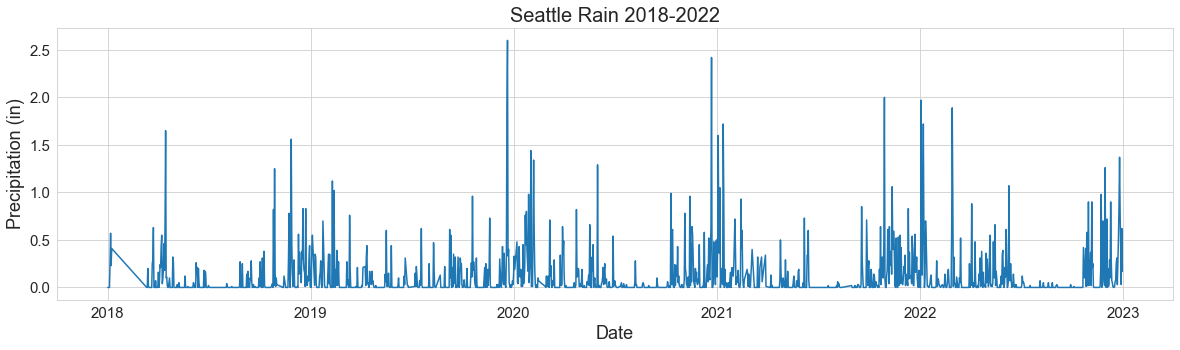

In [15]:
# Plot the daily precipitation data for Seattle.
plt.figure(figsize=(20,5))

sns.lineplot(data=sea_df,x='DATE',y='PRCP')

plt.title('Seattle Rain 2018-2022', fontsize=20)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Precipitation (in)', fontsize=18)

plt.tick_params(labelsize=15)

plt.show()


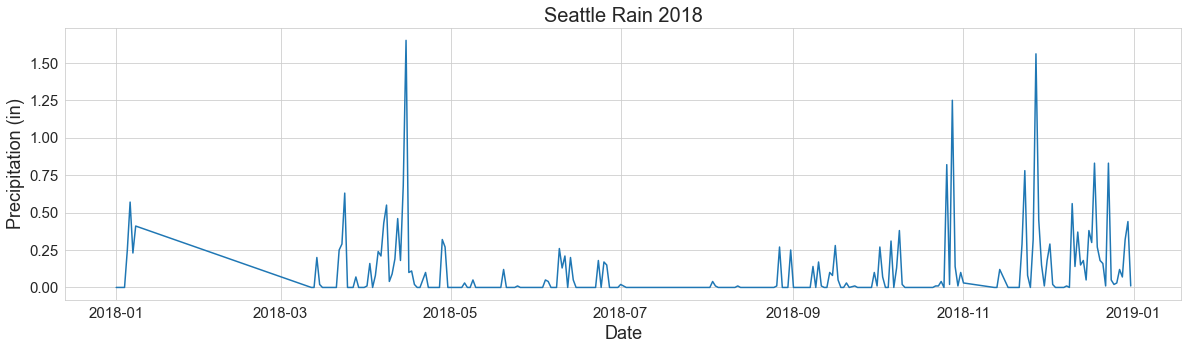

In [16]:
# Plot the daily precipitation data for Seattle, looking only at 2018.
plt.figure(figsize=(20,5))

sns.lineplot(data=sea_df[sea_df['DATE'].dt.year == 2018],x='DATE',y='PRCP')

plt.title('Seattle Rain 2018', fontsize=20)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Precipitation (in)', fontsize=18)

plt.tick_params(labelsize=15)

plt.show()


## Visualizing the data we see there's a lot of null data in one period of time, between January and March of 2018

Before we proceed we should examine the null data further so we don't assume it is randomly distributed, and find the best imputation method

In [17]:
# I will start by creating a df of the full number of days between our expected time range:
complete_calendar = pd.date_range(start='2018-01-01', end='2022-12-31')
sea_missing_days = complete_calendar.difference(sea_df['DATE'])

print(f"Seattle is missing {len(sea_missing_days)} days between {sea_missing_days.min()} and {sea_missing_days.max()}")

Seattle is missing 168 days between 2018-01-09 00:00:00 and 2022-03-26 00:00:00


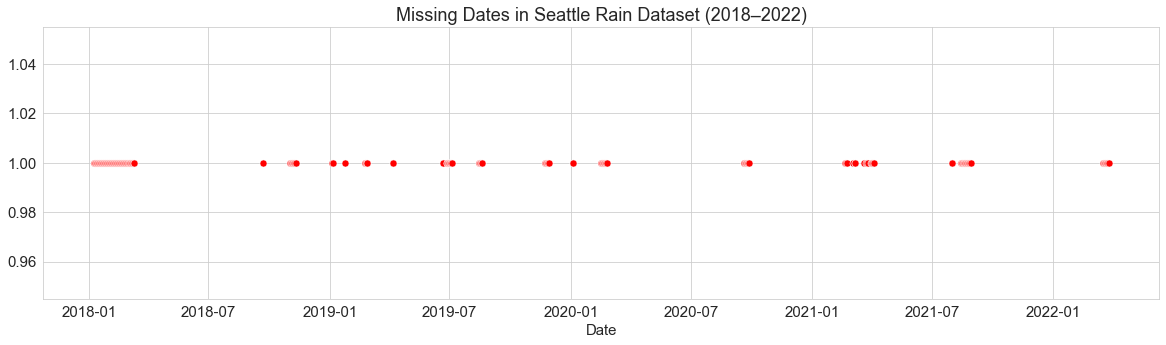

In [18]:
# plot the missing days

# seaborn needs a dataframe, not an array
sea_missing_days_df = pd.DataFrame({'DATE':sea_missing_days})

# use a dummy variable for the y axis
plt.figure(figsize=(20,5))
sns.scatterplot(data=sea_missing_days_df, x='DATE', y=[1]*len(sea_missing_days_df), color='red', s=50)

plt.title('Missing Dates in Seattle Rain Dataset (2018–2022)', fontsize=18)
plt.xlabel('Date', fontsize=15)
plt.tick_params(labelsize=15)

plt.show()

The plot above shows that a lot of data is missing January 2018, but there are also missing values in January of 2019 and 2020. This may inform how we impute the data

Let's drill into the missing data a little more so we know if we can proceed with imputing with the averages of the same day of the year, using the other years' data

In [19]:
# visualize the above by month to make things a little more clear
missing_by_month = sea_missing_days_df.groupby(sea_missing_days_df['DATE'].dt.to_period('M')).count()


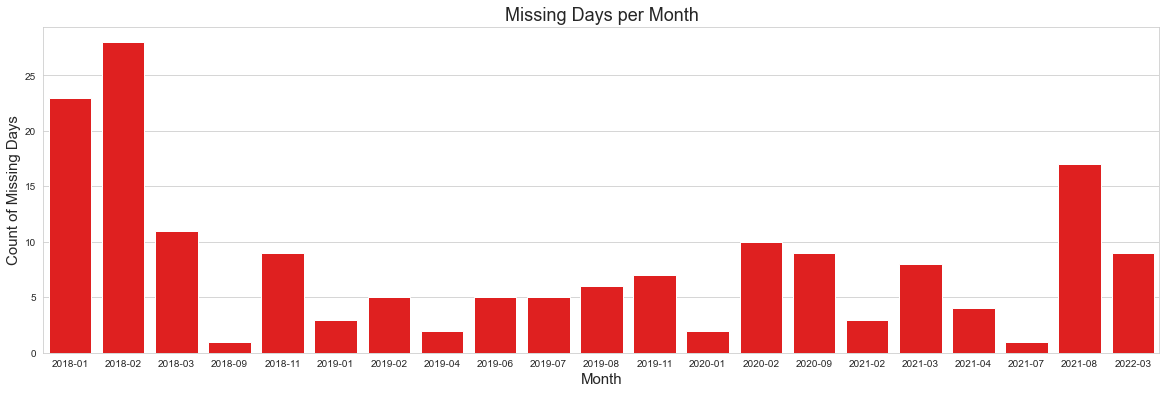

In [20]:
# plot the number of missing days, in each month
plt.figure(figsize=(20,6))
sns.barplot(x=missing_by_month.index.astype(str), y=missing_by_month['DATE'], color='red')

plt.title('Missing Days per Month', fontsize=18)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Count of Missing Days', fontsize=15)
plt.show()

## Imputing the data
Thankfully the bulk of the missing data is in two months of the same year. We can feel some what confident that we can use the other data present to impute these values since it is fairly balanced. We will impute the data once we join with Portland.


# Portland Data
In our preliminary EDA Portland's data appeared to be passing all sanity checks. Let's focus in and make sure there are no other surprises

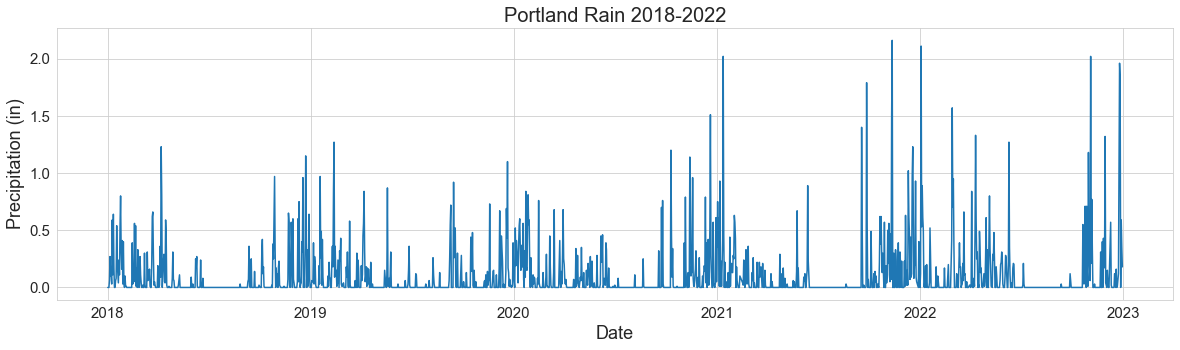

In [21]:
# Plot the daily precipitation data for Seattle.
plt.figure(figsize=(20,5))

sns.lineplot(data=pdx_df,x='DATE',y='PRCP')

plt.title('Portland Rain 2018-2022', fontsize=20)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Precipitation (in)', fontsize=18)

plt.tick_params(labelsize=15)

plt.show()

The graph above looks good, nothing stands out. We already verified that there are no missing dates and all our columns we need are present. Before we begin our analysis, we should join the data, finish our imputation of Seattle's missing dates, and confirm the join occured cleanly

In [22]:
# drop cols you don't need from both
print(sea_df.columns)
sea_df = sea_df.drop(['DAPR', 'MDPR','SNOW', 'SNWD',
       'WESD', 'WESF'], axis=1)
sea_df.head()

Index(['STATION', 'NAME', 'DATE', 'DAPR', 'MDPR', 'PRCP', 'SNOW', 'SNWD',
       'WESD', 'WESF'],
      dtype='object')


,STATION,NAME,DATE,PRCP
0,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-01,0.00
1,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-02,0.00
2,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-03,0.00
3,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-04,0.00
4,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-05,0.25


In [23]:
# drop cols you don't need from both
print(pdx_df.columns)
pdx_df = pdx_df.drop(['DAPR', 'MDPR', 'SNOW', 'SNWD'], axis=1)
pdx_df.head()

Index(['STATION', 'NAME', 'DATE', 'DAPR', 'MDPR', 'PRCP', 'SNOW', 'SNWD'], dtype='object')


,STATION,NAME,DATE,PRCP
0,USC00356749,"PORTLAND KGW TV, OR US",2018-01-01,0.00
1,USC00356749,"PORTLAND KGW TV, OR US",2018-01-02,0.00
2,USC00356749,"PORTLAND KGW TV, OR US",2018-01-03,0.00
3,USC00356749,"PORTLAND KGW TV, OR US",2018-01-04,0.06
4,USC00356749,"PORTLAND KGW TV, OR US",2018-01-05,0.27


In [24]:
# merge the two datasets together, using only the columns we are interested in
rain_df = pd.merge(pdx_df[['DATE','PRCP']],sea_df[['DATE','PRCP']], on='DATE', how='outer',suffixes=('_pdx','_sea'))
rain_df.head()

,DATE,PRCP_pdx,PRCP_sea
0,2018-01-01,0.00,0.00
1,2018-01-02,0.00,0.00
2,2018-01-03,0.00,0.00
3,2018-01-04,0.06,0.00
4,2018-01-05,0.27,0.25


In [25]:
# create a tidy dataframe to assist in plotting and visualizaiton
rain_df = pd.melt(rain_df,id_vars='DATE',var_name='city', value_name='precip')
rain_df.head()

,DATE,city,precip
0,2018-01-01,PRCP_pdx,0.00
1,2018-01-02,PRCP_pdx,0.00
2,2018-01-03,PRCP_pdx,0.00
3,2018-01-04,PRCP_pdx,0.06
4,2018-01-05,PRCP_pdx,0.27


In [26]:
# improve readability and update labels
rain_df.loc[rain_df['city']=='PRCP_pdx','city'] = 'PDX'
rain_df.loc[rain_df['city']=='PRCP_sea','city'] = 'SEA'
rain_df = rain_df.rename(columns={'DATE':'date'})
rain_df.head()

,date,city,precip
0,2018-01-01,PDX,0.00
1,2018-01-02,PDX,0.00
2,2018-01-03,PDX,0.00
3,2018-01-04,PDX,0.06
4,2018-01-05,PDX,0.27


# rain_df is almost ready for analysis!
## We now have one dataframe to use moving forward, however we still need to impute the data from Seattle!

Recall that we already inspected the Seattle data thoroughly, and feel comfortable using the average day-of-the-year as the imputation for missing data. This will effectively find all the same calendar days in the non-missing data, average them, and impute the nulls with that average.

In [27]:
# pull up null days again from Seattle data
rain_df.loc[(rain_df['city'] == 'SEA') & (rain_df['precip'].isna()), 'date']

1834   2018-01-09
1835   2018-01-10
1836   2018-01-11
1837   2018-01-12
1838   2018-01-13
          ...    
3368   2022-03-23
3369   2022-03-24
3370   2022-03-25
3371   2022-03-26
3372   2022-03-27
Name: date, Length: 190, dtype: datetime64[ns]

In [28]:
# verify leap year is NOT one of the null days or we'll have no data to fill!

rain_df.loc[
    (rain_df['city'] == 'SEA')
    & (rain_df['date'].dt.month == 2)
    & (rain_df['date'].dt.day == 29)
    & (rain_df['precip'].isna()),
    'date'
]

Series([], Name: date, dtype: datetime64[ns])

In [29]:
# create a new column for day of year
rain_df['day_of_year']=pd.DatetimeIndex(rain_df['date']).day_of_year

# trying to find means over common days of the year
mean_day_precipitation = rain_df.loc[
    rain_df['city'] == 'SEA',
    # focused on precipitation, and the day of the year
    ['precip','day_of_year']
# group by that day of the year to only get 1 average value per day of the year
].groupby(
    'day_of_year'
).mean()

# grab indicies of where we're missing values
indices = np.where(rain_df['precip'].isna() == True)[0]

for index in indices:
    rain_df.loc[index, 'precip'] = mean_day_precipitation.loc[rain_df.loc[index,'day_of_year']].values[0]


In [30]:
rain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         3652 non-null   datetime64[ns]
 1   city         3652 non-null   object        
 2   precip       3652 non-null   float64       
 3   day_of_year  3652 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 114.2+ KB


In [33]:
# inspect some summary statistics by city
rain_df[['city','precip']].groupby('city').describe()

precip                                                
       count      mean       std  min  25%   50%   75%   max
city                                                        
PDX   1826.0  0.106652  0.238471  0.0  0.0  0.00  0.11  2.16
SEA   1826.0  0.113270  0.240516  0.0  0.0  0.01  0.12  2.60

This dataset is cleaned, vetted, prepped, and ready to go! We will now export it and run EDA in a separate notebook, on the cleaned data

## Export the clean .csv file

In [34]:
rain_df.to_csv('clean_sea_pdx_rain.csv', encoding='utf-8-sig', index=False)